In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy import special
from scipy.stats import linregress
%matplotlib inline

/Users/andrewcarr/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Major League Baseball:  height, weight, and age comparison original

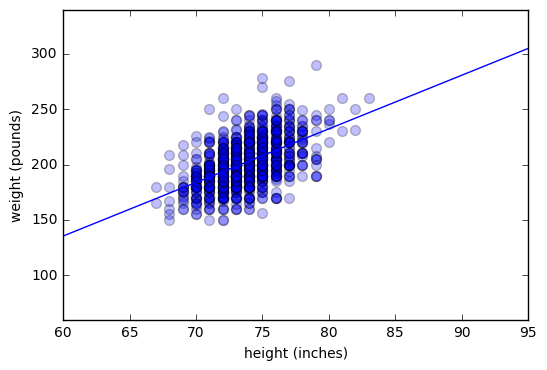

In [3]:
mlb = np.load("mlb.npy")
plt.scatter(mlb[:,0],mlb[:,1],s=50, alpha=0.25)
a,b,stuff1,stuf2f,stuf3f = linregress(mlb[:,0],mlb[:,1])
x = np.linspace(60,95,100)
plt.xlim([60,95])
plt.ylim([60,340])
plt.plot(x,a*x+b)
plt.xlabel("height (inches)")
plt.ylabel("weight (pounds)")
plt.show()

## Major League Baseball:  height, weight, and age comparison remade

I used several design principles here. I added another dimesion by using color to represent age in years, and then I labeled the least squares line and colored it grey to make it not as prevalent

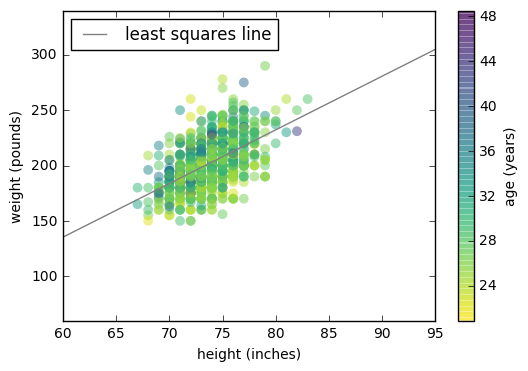

In [6]:
mlb = np.load("mlb.npy")
plt.scatter(mlb[:,0],mlb[:,1],c=mlb[:,2],s=50, alpha=0.5, linewidth=0, cmap="viridis_r")
a,b,stuff1,stuf2f,stuf3f = linregress(mlb[:,0],mlb[:,1])
x = np.linspace(60,95,100)
plt.xlim([60,95])
plt.ylim([60,340])
plt.plot(x,a*x+b,c='grey',label="least squares line")
plt.xlabel("height (inches)")
plt.ylabel("weight (pounds)")
plt.legend(loc = "upper left")
cbar = plt.colorbar()
cbar.set_label("age (years)")

plt.show()

We see above that there is a correlation between height and weight, however there does not seem to be any significant relationship between those values and the age of a player

## Earthquake Plots Original

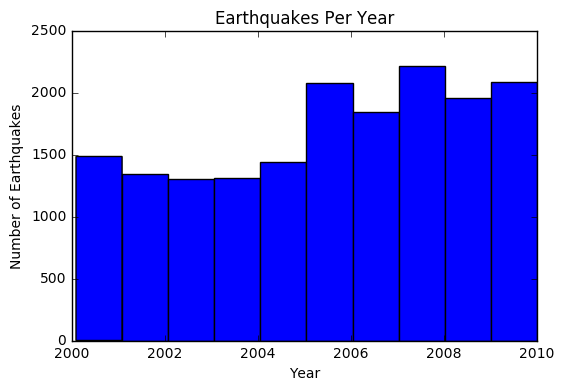

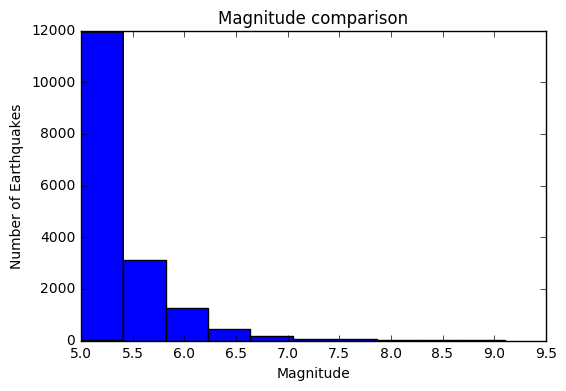

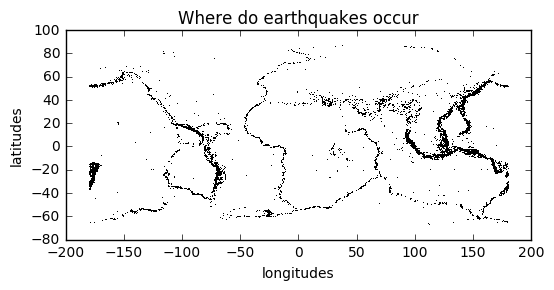

In [4]:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T

plt.hist(year, bins=10)
plt.title("Earthquakes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.show()

plt.hist(magnitude,bins=10)
plt.title("Magnitude comparison")
plt.xlabel("Magnitude")
plt.ylabel("Number of Earthquakes")
plt.show()


plt.plot(longitude, latitude, 'k,')
plt.title("Where do earthquakes occur")
plt.ylabel("latitudes")
plt.xlabel("longitudes")
plt.gca().set_aspect("equal")

## Earthquake Plots Remade

I used the design principles of color and opacity to help give the graphs more life. Then I used basemap to better visualize the earthquake positions

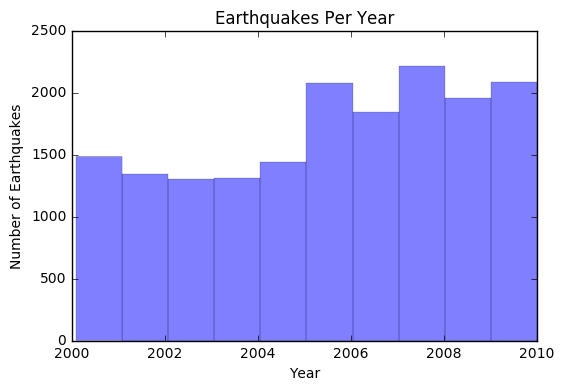

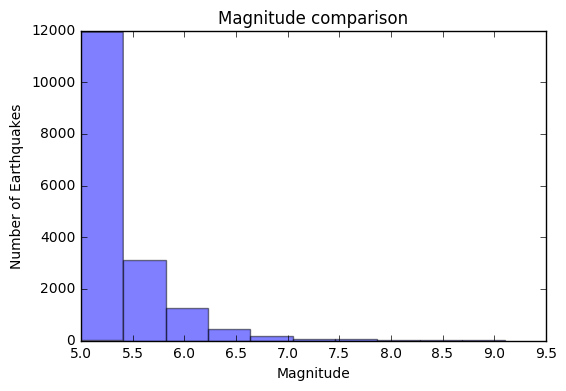

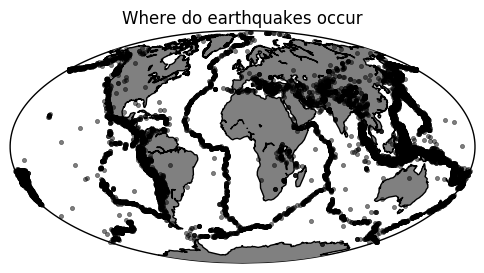

In [25]:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T

plt.hist(year, bins=10, alpha=0.5,linewidth=0.25)
plt.title("Earthquakes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.show()

plt.hist(magnitude,bins=10, alpha=0.5) # Log transform on magnitude data, remove lines
plt.title("Magnitude comparison")
plt.xlabel("Magnitude")
plt.ylabel("Number of Earthquakes")
plt.show()


plt.title("Where do earthquakes occur")
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

m = Basemap(projection='moll',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='white')

# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,420.,60.))
X,Y = m(longitude, latitude)
m.plot(X,Y,"k.", alpha=0.5, linewidth=0)
plt.show()  # transform of magnitude, then use color for 3rd magnitude dimension